In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28)).astype('float32') / 255

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(28, 28), return_sequences=False))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6319 - loss: 1.0370 - val_accuracy: 0.7758 - val_loss: 0.6417
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7757 - loss: 0.6378 - val_accuracy: 0.7877 - val_loss: 0.5927
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7936 - loss: 0.5900 - val_accuracy: 0.7783 - val_loss: 0.6171
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8005 - loss: 0.5619 - val_accuracy: 0.8100 - val_loss: 0.5369
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8071 - loss: 0.5451 - val_accuracy: 0.7973 - val_loss: 0.5665
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8153 - loss: 0.5323 - val_accuracy: 0.8170 - val_loss: 0.5164
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8136 - loss: 0.5280 - val_accuracy: 0.8222 - val_loss: 0.5038
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8175 - loss: 0

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7993 - loss: 0.6056


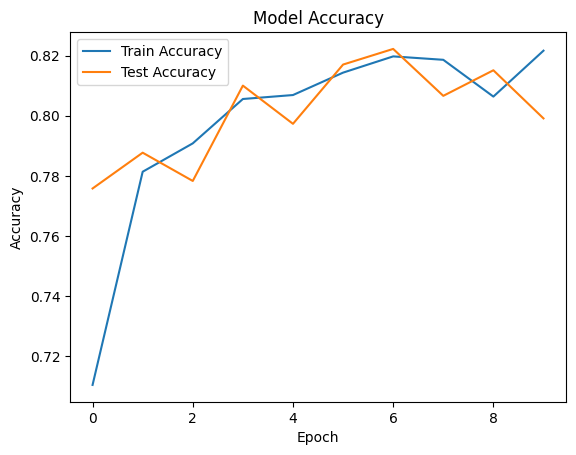

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
classification_report_text = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
print(classification_report_text)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.75      0.75      1000
     Trouser       0.93      0.92      0.93      1000
    Pullover       0.68      0.75      0.71      1000
       Dress       0.73      0.82      0.77      1000
        Coat       0.68      0.68      0.68      1000
      Sandal       0.90      0.92      0.91      1000
       Shirt       0.60      0.47      0.53      1000
     Sneaker       0.89      0.88      0.88      1000
         Bag       0.93      0.89      0.91      1000
  Ankle boot       0.90      0.91      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



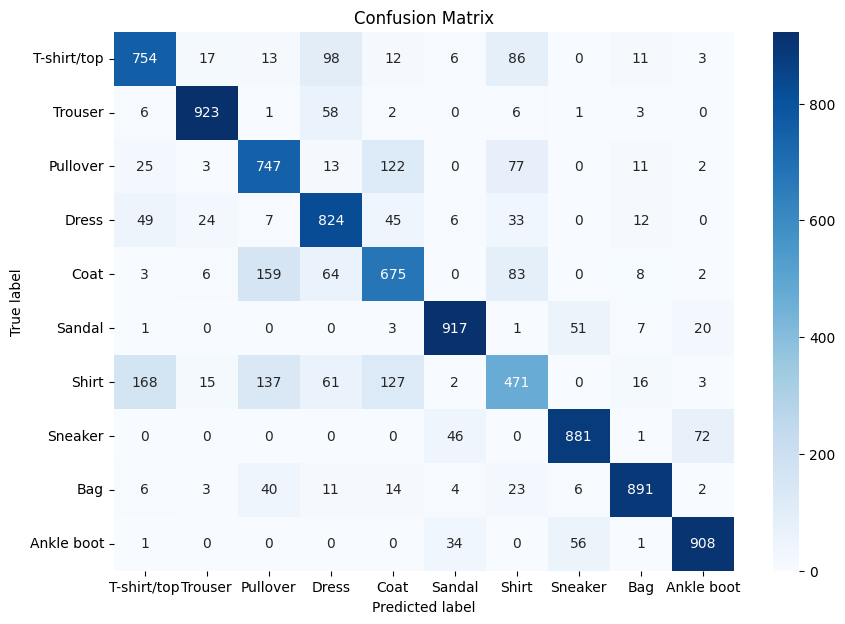

In [11]:
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
accuracy = np.sum(np.diag(confusion_mtx)) / np.sum(confusion_mtx)
print(f'Overall Accuracy: {accuracy:.2f}')

class_accuracies = confusion_mtx.diagonal() / confusion_mtx.sum(axis=1)
for i, acc in enumerate(class_accuracies):
    print(f'Accuracy for class {i}: {acc:.2f}')

Overall Accuracy: 0.80
Accuracy for class 0: 0.75
Accuracy for class 1: 0.92
Accuracy for class 2: 0.75
Accuracy for class 3: 0.82
Accuracy for class 4: 0.68
Accuracy for class 5: 0.92
Accuracy for class 6: 0.47
Accuracy for class 7: 0.88
Accuracy for class 8: 0.89
Accuracy for class 9: 0.91
